In [1]:
import bz2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime
from scipy import stats
import seaborn as sns
import math 
import random
from sklearn import datasets
%config InlineBackend.figure_format = 'svg'
%matplotlib inline
import pickle as pk
# Loading the stored data set into in-memory data frame
with bz2.BZ2File("output.data.bin","rb") as reader:
    data = pk.load(reader)

# display the first 5 records
data.head()

C/A  UNIT       SCP STATION LINENAME DIVISION       DATE      TIME  \
0  A002  R051  02-00-00   59 ST  NQR456W      BMT 2017-12-30  03:00:00   
1  A002  R051  02-00-00   59 ST  NQR456W      BMT 2017-12-30  07:00:00   
2  A002  R051  02-00-00   59 ST  NQR456W      BMT 2017-12-30  11:00:00   
3  A002  R051  02-00-00   59 ST  NQR456W      BMT 2017-12-30  15:00:00   
4  A002  R051  02-00-00   59 ST  NQR456W      BMT 2017-12-30  19:00:00   

      DESC  ENTRIES  \
0  REGULAR  6463109   
1  REGULAR  6463119   
2  REGULAR  6463178   
3  REGULAR  6463373   
4  REGULAR  6463712   

   EXITS                                                                 
0                                            2187558                     
1                                            2187567                     
2                                            2187654                     
3                                            2187736                     
4                                            2187803

Data collection:

In [2]:
from sqlalchemy import create_engine
# Create SQLalchemy SQL engine
engine = create_engine("sqlite:///moroojdb.db")

# select only 4 months from the data of 2018 year
df = data.loc[(data['DATE'] >= '2018-01-06') & (data['DATE'] <= '2018-04-30')]
df.head()

C/A  UNIT       SCP STATION LINENAME DIVISION       DATE      TIME  \
200665  A002  R051  02-00-00   59 ST  NQR456W      BMT 2018-01-06  03:00:00   
200666  A002  R051  02-00-00   59 ST  NQR456W      BMT 2018-01-06  07:00:00   
200667  A002  R051  02-00-00   59 ST  NQR456W      BMT 2018-01-06  11:00:00   
200668  A002  R051  02-00-00   59 ST  NQR456W      BMT 2018-01-06  15:00:00   
200669  A002  R051  02-00-00   59 ST  NQR456W      BMT 2018-01-06  19:00:00   

           DESC  ENTRIES  \
200665  REGULAR  6470216   
200666  REGULAR  6470223   
200667  REGULAR  6470256   
200668  REGULAR  6470379   
200669  REGULAR  6470665   

        EXITS                                                                 
200665                                            2190123                     
200666                                            2190140                     
200667                                            2190229                     
200668                                            2190299                     
200669                                            2190366

In [3]:
data = None
# Insert the data frame into SQL database
df.to_sql("mta",con=engine,if_exists='replace')
print("Data Loaded Successfully")

Data Loaded Successfully


In [4]:
# Read the weather data from the downloaded weather data file for 2018 year
ws = pd.read_csv("Weather.2018.all.csv",header=0,names=['id','type','severity','starttime','endtime','timezone','airportcode','lat','lng','city','county','state','zipcode'])

In [5]:
ws.head()

id  type severity            starttime              endtime  \
0  W-966  Rain    Light  2018-01-07 03:36:00  2018-01-07 03:54:00   
1  W-967  Snow    Light  2018-01-07 03:54:00  2018-01-07 07:12:00   
2  W-968  Snow    Light  2018-01-11 03:36:00  2018-01-11 03:54:00   
3  W-969  Snow    Light  2018-01-12 13:54:00  2018-01-12 15:12:00   
4  W-970  Snow    Light  2018-01-12 15:54:00  2018-01-12 16:36:00   

      timezone airportcode      lat       lng      city    county state  \
0  US/Mountain        K04V  38.0972 -106.1689  Saguache  Saguache    CO   
1  US/Mountain        K04V  38.0972 -106.1689  Saguache  Saguache    CO   
2  US/Mountain        K04V  38.0972 -106.1689  Saguache  Saguache    CO   
3  US/Mountain        K04V  38.0972 -106.1689  Saguache  Saguache    CO   
4  US/Mountain        K04V  38.0972 -106.1689  Saguache  Saguache    CO   

   zipcode  
0  81149.0  
1  81149.0  
2  81149.0  
3  81149.0  
4  81149.0

In [6]:
# Select only the first 4 months to match those selected for turnstile data
mask = (ws['starttime'] > '2018-01-06') & (ws['starttime'] < '2018-04-30')
ws[mask].tail()

id   type severity            starttime              endtime  \
1328310  W-6275007   Snow    Light  2018-04-24 15:53:00  2018-04-24 16:45:00   
1328311  W-6275008   Rain    Light  2018-04-28 21:15:00  2018-04-28 21:53:00   
1328312  W-6275009   Rain    Light  2018-04-28 23:12:00  2018-04-28 23:28:00   
1328313  W-6275010   Rain    Light  2018-04-29 01:51:00  2018-04-29 01:53:00   
1328314  W-6275011  Storm   Severe  2018-04-29 21:53:00  2018-04-29 22:53:00   

            timezone airportcode      lat       lng    city   county state  \
1328310  US/Mountain        KBVR  42.5833 -108.2833  Lander  Fremont    WY   
1328311  US/Mountain        KBVR  42.5833 -108.2833  Lander  Fremont    WY   
1328312  US/Mountain        KBVR  42.5833 -108.2833  Lander  Fremont    WY   
1328313  US/Mountain        KBVR  42.5833 -108.2833  Lander  Fremont    WY   
1328314  US/Mountain        KBVR  42.5833 -108.2833  Lander  Fremont    WY   

         zipcode  
1328310  82520.0  
1328311  82520.0  
1328312  82520.0  
1328313  82520.0  
1328314  82520.0

In [7]:
# insert weather into sql table named "Weather"
ws[mask].to_sql("weather",con=engine,if_exists='replace')

In [8]:
ws['starttime_c'] = pd.to_datetime(ws.starttime,format='%Y-%m-%d')

In [9]:
# Merge both data sets using pandas data frame merge operation by date
merged_data = pd.merge(df,ws,left_on='DATE',right_on='starttime_c')

In [10]:
ws = None
df = merged_data
# Convert SQL Columns into upper case letters
df.columns = [col.upper() for col in df.columns]
#merged_data = pd.read_sql(f'select st.*,w.type,w.severity from mta st left join weather w on date(st."DATE") = date(w."starttime");',con=engine)

In [11]:
# Remove trailing whitespaces from columns names
merged_data.columns = [column.strip() for column in merged_data.columns]
merged_data.head()

C/A  UNIT       SCP STATION LINENAME DIVISION       DATE      TIME  \
0  A002  R051  02-00-00   59 ST  NQR456W      BMT 2018-01-08  03:00:00   
1  A002  R051  02-00-00   59 ST  NQR456W      BMT 2018-01-08  07:00:00   
2  A002  R051  02-00-00   59 ST  NQR456W      BMT 2018-01-08  11:00:00   
3  A002  R051  02-00-00   59 ST  NQR456W      BMT 2018-01-08  15:00:00   
4  A002  R051  02-00-00   59 ST  NQR456W      BMT 2018-01-08  19:00:00   

      DESC  ENTRIES  ...              ENDTIME    TIMEZONE AIRPORTCODE  \
0  REGULAR  6471341  ...  2018-01-08 04:53:00  US/Central        KVIH   
1  REGULAR  6471353  ...  2018-01-08 04:53:00  US/Central        KVIH   
2  REGULAR  6471501  ...  2018-01-08 04:53:00  US/Central        KVIH   
3  REGULAR  6471703  ...  2018-01-08 04:53:00  US/Central        KVIH   
4  REGULAR  6472505  ...  2018-01-08 04:53:00  US/Central        KVIH   

       LAT      LNG   CITY  COUNTY STATE  ZIPCODE  STARTTIME_C  
0  38.1319 -91.7653  Vichy  Maries    MO  65580.0   2018-01-08  
1  38.1319 -91.7653  Vichy  Maries    MO  65580.0   2018-01-08  
2  38.1319 -91.7653  Vichy  Maries    MO  65580.0   2018-01-08  
3  38.1319 -91.7653  Vichy  Maries    MO  65580.0   2018-01-08  
4  38.1319 -91.7653  Vichy  Maries    MO  65580.0   2018-01-08  

[5 rows x 25 columns]

In [12]:
ws_count = merged_data.groupby(['TYPE']).count()
ws_count

C/A     UNIT      SCP  STATION  LINENAME  DIVISION     DATE  \
TYPE                                                                     
Cold    113711   113711   113711   113711    113711    113711   113711   
Fog     370219   370219   370219   370219    370219    370219   370219   
Rain   2467201  2467201  2467201  2467201   2467201   2467201  2467201   
Snow    761596   761596   761596   761596    761596    761596   761596   
Storm    56310    56310    56310    56310     56310     56310    56310   

          TIME     DESC  ENTRIES  ...  ENDTIME  TIMEZONE  AIRPORTCODE  \
TYPE                              ...                                   
Cold    113711   113711   113711  ...   113711    113711       113711   
Fog     370219   370219   370219  ...   370219    370219       370219   
Rain   2467201  2467201  2467201  ...  2467201   2467201      2467201   
Snow    761596   761596   761596  ...   761596    761596       761596   
Storm    56310    56310    56310  ...    56310     56310        56310   

           LAT      LNG     CITY   COUNTY    STATE  ZIPCODE  STARTTIME_C  
TYPE                                                                      
Cold    113711   113711   113711   113711   113711   113711       113711  
Fog     370219   370219   370219   370219   370219   370219       370219  
Rain   2467201  2467201  2467201  2467201  2467201  2467201      2467201  
Snow    761596   761596   761596   761596   761596   733456       761596  
Storm    56310    56310    56310    56310    56310    56310        56310  

[5 rows x 24 columns]

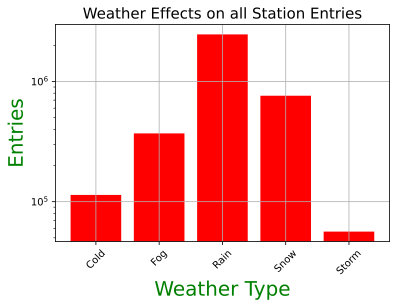

In [13]:
%config InlineBackend.figure_format = 'svg'
# create a bar plot with weather type against the entries
plt.bar(ws_count.index,ws_count['ENTRIES'],color='r')
plt.title("Weather Effects on all Station Entries",fontsize=15)
plt.xlabel("Weather Type",color='g',fontsize=20)
plt.ylabel("Entries",color='g',fontsize=20)
plt.xticks(rotation=45)
plt.yscale('log')
plt.grid()
plt.savefig("weather.effects.entries.png")

In [14]:
df.columns = [column.upper() for column in df.columns]
df.head()

C/A  UNIT       SCP STATION LINENAME DIVISION       DATE      TIME  \
0  A002  R051  02-00-00   59 ST  NQR456W      BMT 2018-01-08  03:00:00   
1  A002  R051  02-00-00   59 ST  NQR456W      BMT 2018-01-08  07:00:00   
2  A002  R051  02-00-00   59 ST  NQR456W      BMT 2018-01-08  11:00:00   
3  A002  R051  02-00-00   59 ST  NQR456W      BMT 2018-01-08  15:00:00   
4  A002  R051  02-00-00   59 ST  NQR456W      BMT 2018-01-08  19:00:00   

      DESC  ENTRIES  ...              ENDTIME    TIMEZONE AIRPORTCODE  \
0  REGULAR  6471341  ...  2018-01-08 04:53:00  US/Central        KVIH   
1  REGULAR  6471353  ...  2018-01-08 04:53:00  US/Central        KVIH   
2  REGULAR  6471501  ...  2018-01-08 04:53:00  US/Central        KVIH   
3  REGULAR  6471703  ...  2018-01-08 04:53:00  US/Central        KVIH   
4  REGULAR  6472505  ...  2018-01-08 04:53:00  US/Central        KVIH   

       LAT      LNG   CITY  COUNTY STATE  ZIPCODE  STARTTIME_C  
0  38.1319 -91.7653  Vichy  Maries    MO  65580.0   2018-01-08  
1  38.1319 -91.7653  Vichy  Maries    MO  65580.0   2018-01-08  
2  38.1319 -91.7653  Vichy  Maries    MO  65580.0   2018-01-08  
3  38.1319 -91.7653  Vichy  Maries    MO  65580.0   2018-01-08  
4  38.1319 -91.7653  Vichy  Maries    MO  65580.0   2018-01-08  

[5 rows x 25 columns]

In [15]:
ws_severity = merged_data.groupby(['SEVERITY']).count()
ws_severity

C/A     UNIT      SCP  STATION  LINENAME  DIVISION     DATE  \
SEVERITY                                                                    
Light     3088043  3088043  3088043  3088043   3088043   3088043  3088043   
Moderate   196986   196986   196986   196986    196986    196986   196986   
Severe     484008   484008   484008   484008    484008    484008   484008   

             TIME     DESC  ENTRIES  ...  ENDTIME  TIMEZONE  AIRPORTCODE  \
SEVERITY                             ...                                   
Light     3088043  3088043  3088043  ...  3088043   3088043      3088043   
Moderate   196986   196986   196986  ...   196986    196986       196986   
Severe     484008   484008   484008  ...   484008    484008       484008   

              LAT      LNG     CITY   COUNTY    STATE  ZIPCODE  STARTTIME_C  
SEVERITY                                                                     
Light     3088043  3088043  3088043  3088043  3088043  3059903      3088043  
Moderate   196986   196986   196986   196986   196986   196986       196986  
Severe     484008   484008   484008   484008   484008   484008       484008  

[3 rows x 24 columns]

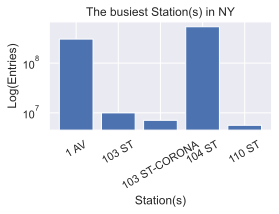

In [117]:
# draw a bar plot for the top 5 busiest stations by log of entries
st_mean = df.groupby(['STATION']).ENTRIES.mean()
st_mean.sort_values(ascending=False)
plt.figure(figsize=[4,2])
plt.yscale('log')
plt.title("The busiest Station(s) in NY")
plt.xlabel("Station(s)")
plt.ylabel("Log(Entries)")
plt.bar(st_mean.index[:5],st_mean[:5,])
plt.xticks(rotation=30)
plt.savefig("busiest.stations.png")

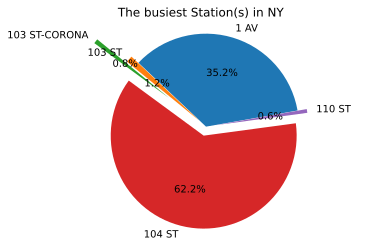

In [17]:
# draw a pie chart for the top 5 busiest stations
sizes = [15, 30, 45, 10,10]
explode = (0, 0.1, 0.5, 0.1,0.1)  
fig1, ax1 = plt.subplots()
ax1.pie(st_mean[:5], explode=explode, labels=st_mean.index[:5], autopct='%1.1f%%',
       startangle=10)
ax1.axis('equal')  
plt.title("The busiest Station(s) in NY")
plt.savefig("busiest.stations.pie.png")

In [18]:
x=pd.read_sql('select * from mta order by SCP limit 10;',engine)
x

index   C/A  UNIT       SCP     STATION LINENAME DIVISION  \
0  201168  A006  R079  00-00-00  5 AV/59 ST     NQRW      BMT   
1  201169  A006  R079  00-00-00  5 AV/59 ST     NQRW      BMT   
2  201170  A006  R079  00-00-00  5 AV/59 ST     NQRW      BMT   
3  201171  A006  R079  00-00-00  5 AV/59 ST     NQRW      BMT   
4  201172  A006  R079  00-00-00  5 AV/59 ST     NQRW      BMT   
5  201173  A006  R079  00-00-00  5 AV/59 ST     NQRW      BMT   
6  201174  A006  R079  00-00-00  5 AV/59 ST     NQRW      BMT   
7  201175  A006  R079  00-00-00  5 AV/59 ST     NQRW      BMT   
8  201176  A006  R079  00-00-00  5 AV/59 ST     NQRW      BMT   
9  201177  A006  R079  00-00-00  5 AV/59 ST     NQRW      BMT   

                         DATE      TIME     DESC  ENTRIES  \
0  2018-01-06 00:00:00.000000  01:00:00  REGULAR  3179410   
1  2018-01-06 00:00:00.000000  05:00:00  REGULAR  3179415   
2  2018-01-06 00:00:00.000000  09:00:00  REGULAR  3179445   
3  2018-01-06 00:00:00.000000  13:00:00  REGULAR  3179529   
4  2018-01-06 00:00:00.000000  17:00:00  REGULAR  3179787   
5  2018-01-06 00:00:00.000000  21:00:00  REGULAR  3180105   
6  2018-01-07 00:00:00.000000  01:00:00  REGULAR  3180208   
7  2018-01-07 00:00:00.000000  05:00:00  REGULAR  3180218   
8  2018-01-07 00:00:00.000000  09:00:00  REGULAR  3180238   
9  2018-01-07 00:00:00.000000  13:00:00  REGULAR  3180293   

   EXITS                                                                 
0                                            5399069                     
1                                            5399077                     
2                                            5399278                     
3                                            5399601                     
4                                            5399904                     
5                                            5400088                     
6                                            5400166                     
7                                            5400174                     
8                                            5400272                     
9                                            5400620

In [19]:
df = None
df = merged_data
df[df.STATION.isnull()]

Empty DataFrame
Columns: [C/A, UNIT, SCP, STATION, LINENAME, DIVISION, DATE, TIME, DESC, ENTRIES, EXITS, ID, TYPE, SEVERITY, STARTTIME, ENDTIME, TIMEZONE, AIRPORTCODE, LAT, LNG, CITY, COUNTY, STATE, ZIPCODE, STARTTIME_C]
Index: []

[0 rows x 25 columns]

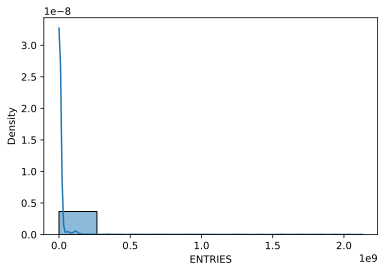

In [20]:
sns.histplot(df['ENTRIES'], kde=True,bins=8, stat='density');

In [21]:
df[df.SCP.isnull()]

Empty DataFrame
Columns: [C/A, UNIT, SCP, STATION, LINENAME, DIVISION, DATE, TIME, DESC, ENTRIES, EXITS, ID, TYPE, SEVERITY, STARTTIME, ENDTIME, TIMEZONE, AIRPORTCODE, LAT, LNG, CITY, COUNTY, STATE, ZIPCODE, STARTTIME_C]
Index: []

[0 rows x 25 columns]

In [22]:
df.shape
df.head()

C/A  UNIT       SCP STATION LINENAME DIVISION       DATE      TIME  \
0  A002  R051  02-00-00   59 ST  NQR456W      BMT 2018-01-08  03:00:00   
1  A002  R051  02-00-00   59 ST  NQR456W      BMT 2018-01-08  07:00:00   
2  A002  R051  02-00-00   59 ST  NQR456W      BMT 2018-01-08  11:00:00   
3  A002  R051  02-00-00   59 ST  NQR456W      BMT 2018-01-08  15:00:00   
4  A002  R051  02-00-00   59 ST  NQR456W      BMT 2018-01-08  19:00:00   

      DESC  ENTRIES  ...              ENDTIME    TIMEZONE AIRPORTCODE  \
0  REGULAR  6471341  ...  2018-01-08 04:53:00  US/Central        KVIH   
1  REGULAR  6471353  ...  2018-01-08 04:53:00  US/Central        KVIH   
2  REGULAR  6471501  ...  2018-01-08 04:53:00  US/Central        KVIH   
3  REGULAR  6471703  ...  2018-01-08 04:53:00  US/Central        KVIH   
4  REGULAR  6472505  ...  2018-01-08 04:53:00  US/Central        KVIH   

       LAT      LNG   CITY  COUNTY STATE  ZIPCODE  STARTTIME_C  
0  38.1319 -91.7653  Vichy  Maries    MO  65580.0   2018-01-08  
1  38.1319 -91.7653  Vichy  Maries    MO  65580.0   2018-01-08  
2  38.1319 -91.7653  Vichy  Maries    MO  65580.0   2018-01-08  
3  38.1319 -91.7653  Vichy  Maries    MO  65580.0   2018-01-08  
4  38.1319 -91.7653  Vichy  Maries    MO  65580.0   2018-01-08  

[5 rows x 25 columns]

In [23]:
# drop rows with NA records
df.dropna(how='any')

C/A  UNIT       SCP        STATION LINENAME DIVISION       DATE  \
0         A002  R051  02-00-00          59 ST  NQR456W      BMT 2018-01-08   
1         A002  R051  02-00-00          59 ST  NQR456W      BMT 2018-01-08   
2         A002  R051  02-00-00          59 ST  NQR456W      BMT 2018-01-08   
3         A002  R051  02-00-00          59 ST  NQR456W      BMT 2018-01-08   
4         A002  R051  02-00-00          59 ST  NQR456W      BMT 2018-01-08   
...        ...   ...       ...            ...      ...      ...        ...   
3769032  TRAM2  R469  00-03-01  RIT-ROOSEVELT        R      RIT 2018-04-26   
3769033  TRAM2  R469  00-03-01  RIT-ROOSEVELT        R      RIT 2018-04-26   
3769034  TRAM2  R469  00-03-01  RIT-ROOSEVELT        R      RIT 2018-04-26   
3769035  TRAM2  R469  00-03-01  RIT-ROOSEVELT        R      RIT 2018-04-26   
3769036  TRAM2  R469  00-03-01  RIT-ROOSEVELT        R      RIT 2018-04-26   

             TIME     DESC  ENTRIES  ...              ENDTIME    TIMEZONE  \
0        03:00:00  REGULAR  6471341  ...  2018-01-08 04:53:00  US/Central   
1        07:00:00  REGULAR  6471353  ...  2018-01-08 04:53:00  US/Central   
2        11:00:00  REGULAR  6471501  ...  2018-01-08 04:53:00  US/Central   
3        15:00:00  REGULAR  6471703  ...  2018-01-08 04:53:00  US/Central   
4        19:00:00  REGULAR  6472505  ...  2018-01-08 04:53:00  US/Central   
...           ...      ...      ...  ...                  ...         ...   
3769032  17:00:00  REGULAR  2876824  ...  2018-04-26 00:35:00  US/Central   
3769033  17:00:00  REGULAR  2876824  ...  2018-04-26 00:18:00  US/Central   
3769034  21:00:00  REGULAR  2876998  ...  2018-04-26 00:53:00  US/Eastern   
3769035  21:00:00  REGULAR  2876998  ...  2018-04-26 00:35:00  US/Central   
3769036  21:00:00  REGULAR  2876998  ...  2018-04-26 00:18:00  US/Central   

        AIRPORTCODE      LAT      LNG       CITY      COUNTY STATE  ZIPCODE  \
0              KVIH  38.1319 -91.7653      Vichy      Maries    MO  65580.0   
1              KVIH  38.1319 -91.7653      Vichy      Maries    MO  65580.0   
2              KVIH  38.1319 -91.7653      Vichy      Maries    MO  65580.0   
3              KVIH  38.1319 -91.7653      Vichy      Maries    MO  65580.0   
4              KVIH  38.1319 -91.7653      Vichy      Maries    MO  65580.0   
...             ...      ...      ...        ...         ...   ...      ...   
3769032        KERV  29.9767 -99.0855  Kerrville        Kerr    TX  78028.0   
3769033        KCOT  28.4567 -99.2183    Cotulla    La Salle    TX  78014.0   
3769034        KWST  41.3509 -71.8054   Westerly  Washington    RI   2891.0   
3769035        KERV  29.9767 -99.0855  Kerrville        Kerr    TX  78028.0   
3769036        KCOT  28.4567 -99.2183    Cotulla    La Salle    TX  78014.0   

         STARTTIME_C  
0         2018-01-08  
1         2018-01-08  
2         2018-01-08  
3         2018-01-08  
4         2018-01-08  
...              ...  
3769032   2018-04-26  
3769033   2018-04-26  
3769034   2018-04-26  
3769035   2018-04-26  
3769036   2018-04-26  

[3740897 rows x 25 columns]

In [24]:
df.info

<bound method DataFrame.info of            C/A  UNIT       SCP        STATION LINENAME DIVISION       DATE  \
0         A002  R051  02-00-00          59 ST  NQR456W      BMT 2018-01-08   
1         A002  R051  02-00-00          59 ST  NQR456W      BMT 2018-01-08   
2         A002  R051  02-00-00          59 ST  NQR456W      BMT 2018-01-08   
3         A002  R051  02-00-00          59 ST  NQR456W      BMT 2018-01-08   
4         A002  R051  02-00-00          59 ST  NQR456W      BMT 2018-01-08   
...        ...   ...       ...            ...      ...      ...        ...   
3769032  TRAM2  R469  00-03-01  RIT-ROOSEVELT        R      RIT 2018-04-26   
3769033  TRAM2  R469  00-03-01  RIT-ROOSEVELT        R      RIT 2018-04-26   
3769034  TRAM2  R469  00-03-01  RIT-ROOSEVELT        R      RIT 2018-04-26   
3769035  TRAM2  R469  00-03-01  RIT-ROOSEVELT        R      RIT 2018-04-26   
3769036  TRAM2  R469  00-03-01  RIT-ROOSEVELT        R      RIT 2018-04-26   

             TIME     DESC  ENT

In [25]:
df.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES', 'EXITS', 'ID', 'TYPE', 'SEVERITY', 'STARTTIME',
       'ENDTIME', 'TIMEZONE', 'AIRPORTCODE', 'LAT', 'LNG', 'CITY', 'COUNTY',
       'STATE', 'ZIPCODE', 'STARTTIME_C'],
      dtype='object')

In [26]:
df.values

array([['A002', 'R051', '02-00-00', ..., 'MO', 65580.0,
        Timestamp('2018-01-08 00:00:00')],
       ['A002', 'R051', '02-00-00', ..., 'MO', 65580.0,
        Timestamp('2018-01-08 00:00:00')],
       ['A002', 'R051', '02-00-00', ..., 'MO', 65580.0,
        Timestamp('2018-01-08 00:00:00')],
       ...,
       ['TRAM2', 'R469', '00-03-01', ..., 'RI', 2891.0,
        Timestamp('2018-04-26 00:00:00')],
       ['TRAM2', 'R469', '00-03-01', ..., 'TX', 78028.0,
        Timestamp('2018-04-26 00:00:00')],
       ['TRAM2', 'R469', '00-03-01', ..., 'TX', 78014.0,
        Timestamp('2018-04-26 00:00:00')]], dtype=object)

In [27]:
df.dtypes

C/A                    object
UNIT                   object
SCP                    object
STATION                object
LINENAME               object
DIVISION               object
DATE           datetime64[ns]
TIME                   object
DESC                   object
ENTRIES                 int64
EXITS                   int64
ID                     object
TYPE                   object
SEVERITY               object
STARTTIME              object
ENDTIME                object
TIMEZONE               object
AIRPORTCODE            object
LAT                   float64
LNG                   float64
CITY                   object
COUNTY                 object
STATE                  object
ZIPCODE               float64
STARTTIME_C    datetime64[ns]
dtype: object

In [28]:
df.sample(4)

C/A  UNIT       SCP          STATION LINENAME DIVISION       DATE  \
2062331  R237  R046  01-00-00  GRD CNTRL-42 ST    4567S      IRT 2018-03-02   
3708131  N089  R139  00-04-00         CANAL ST      ACE      IND 2018-04-26   
2932461  R141  R031  00-00-00   34 ST-PENN STA      123      IRT 2018-04-05   
1332942  R534  R055  01-05-00    FLUSHING-MAIN        7      IRT 2018-02-13   

             TIME     DESC    ENTRIES  ...              ENDTIME    TIMEZONE  \
2062331  03:00:00  REGULAR    1172168  ...  2018-03-02 00:20:00  US/Eastern   
3708131  00:00:00  REGULAR  924763975  ...  2018-04-26 00:53:00  US/Eastern   
2932461  20:00:00  REGULAR    6224526  ...  2018-04-05 00:53:00  US/Central   
1332942  11:00:00  REGULAR     397724  ...  2018-02-13 00:13:00  US/Pacific   

        AIRPORTCODE      LAT       LNG        CITY      COUNTY STATE  ZIPCODE  \
2062331        KSUT  33.9292  -78.0722   Southport   Brunswick    NC  28461.0   
3708131        KWST  41.3509  -71.8054    Westerly  Washington    RI   2891.0   
2932461        KAEX  31.3347  -92.5586  Alexandria     Rapides    LA  71303.0   
1332942        KLSV  36.2362 -115.0343  Nellis AFB       Clark    NV  89191.0   

         STARTTIME_C  
2062331   2018-03-02  
3708131   2018-04-26  
2932461   2018-04-05  
1332942   2018-02-13  

[4 rows x 25 columns]

In [29]:
df[['ENTRIES','EXITS']].describe()


ENTRIES         EXITS
count  3.769037e+06  3.769037e+06
mean   3.926539e+07  3.214482e+07
std    2.055388e+08  1.892961e+08
min    0.000000e+00  0.000000e+00
25%    5.010290e+05  2.507460e+05
50%    2.606541e+06  1.465476e+06
75%    6.897611e+06  4.824921e+06
max    2.130142e+09  2.096926e+09

Text(0, 0.5, 'Normalized EXITS')

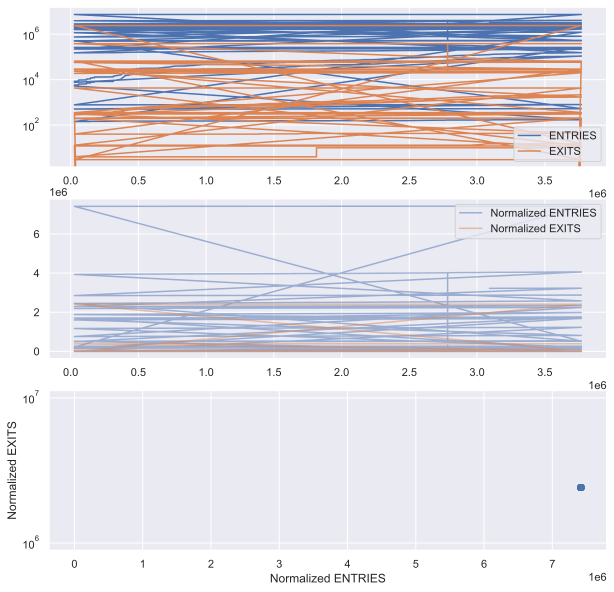

In [118]:
plt.figure(figsize=[10,10])
plt.subplot(3,1,1)
plt.yscale('log')
plt.plot(df['ENTRIES'][:10000])
plt.plot(df['EXITS'][:10000])
plt.legend(['ENTRIES','EXITS'])
plt.subplot(3,1,2)
plt.plot(df.ENTRIES[:10000],alpha = 0.5)
plt.plot(df.EXITS[:10000],alpha = 0.5)
plt.legend(['Normalized ENTRIES','Normalized EXITS'])
plt.subplot(3,1,3)
plt.yscale('log')
plt.scatter(df.ENTRIES[:10000],df.EXITS[:10000],alpha = 0.1)
plt.xlabel('Normalized ENTRIES')
plt.ylabel('Normalized EXITS')

<AxesSubplot:>

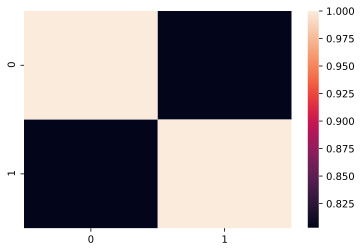

In [31]:
# heatmap displaying correlation between entries and exits
sns.heatmap(np.corrcoef(df.ENTRIES.T,df.EXITS.T))

In [32]:
# joint plot for correlation between entries and exits
sns.set(style="darkgrid", color_codes=True)
j = sns.jointplot('ENTRIES', 'EXITS', data = df[['ENTRIES','EXITS']][:10000], kind='reg', height=8)
#j.annotate(stats.pearsonr)
plt.savefig('correlation.png')

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


In [33]:
df.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES', 'EXITS', 'ID', 'TYPE', 'SEVERITY', 'STARTTIME',
       'ENDTIME', 'TIMEZONE', 'AIRPORTCODE', 'LAT', 'LNG', 'CITY', 'COUNTY',
       'STATE', 'ZIPCODE', 'STARTTIME_C'],
      dtype='object')

In [34]:
df['ENTRIES']

0          6471341
1          6471353
2          6471501
3          6471703
4          6472505
            ...   
3769032    2876824
3769033    2876824
3769034    2876998
3769035    2876998
3769036    2876998
Name: ENTRIES, Length: 3769037, dtype: int64

In [35]:
type(df.ENTRIES)

pandas.core.series.Series

In [36]:
df.ENTRIES.mean()

39265392.84849233

In [37]:
df.EXITS.mean()

32144824.177438162

In [38]:
df.ENTRIES.value_counts()

0            61289
1            25503
2            10639
3             8743
117440512     8730
             ...  
4347297          1
2617042          1
3688994          1
6758092          1
2047             1
Name: ENTRIES, Length: 1482126, dtype: int64

In [39]:
#df.DATE.value_counts().sort_index()
#df

In [40]:
import datetime

In [41]:
df.columns = [column.strip() for column in df.columns]
df.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES', 'EXITS', 'ID', 'TYPE', 'SEVERITY', 'STARTTIME',
       'ENDTIME', 'TIMEZONE', 'AIRPORTCODE', 'LAT', 'LNG', 'CITY', 'COUNTY',
       'STATE', 'ZIPCODE', 'STARTTIME_C'],
      dtype='object')

In [42]:
df.DATE.value_counts().sort_index()

2018-01-08     28132
2018-01-09     29972
2018-01-10     59388
2018-01-11     29358
2018-01-12     27608
               ...  
2018-04-21     56370
2018-04-22     56560
2018-04-23    170244
2018-04-24     28264
2018-04-26     84315
Name: DATE, Length: 68, dtype: int64

In [43]:
df["DATE_TIME"] = pd.to_datetime(df.DATE.astype('str') + " " + df.TIME,format="%Y-%m-%d %H:%M:%S")

In [44]:
df.head()

C/A  UNIT       SCP STATION LINENAME DIVISION       DATE      TIME  \
0  A002  R051  02-00-00   59 ST  NQR456W      BMT 2018-01-08  03:00:00   
1  A002  R051  02-00-00   59 ST  NQR456W      BMT 2018-01-08  07:00:00   
2  A002  R051  02-00-00   59 ST  NQR456W      BMT 2018-01-08  11:00:00   
3  A002  R051  02-00-00   59 ST  NQR456W      BMT 2018-01-08  15:00:00   
4  A002  R051  02-00-00   59 ST  NQR456W      BMT 2018-01-08  19:00:00   

      DESC  ENTRIES  ...    TIMEZONE AIRPORTCODE      LAT      LNG   CITY  \
0  REGULAR  6471341  ...  US/Central        KVIH  38.1319 -91.7653  Vichy   
1  REGULAR  6471353  ...  US/Central        KVIH  38.1319 -91.7653  Vichy   
2  REGULAR  6471501  ...  US/Central        KVIH  38.1319 -91.7653  Vichy   
3  REGULAR  6471703  ...  US/Central        KVIH  38.1319 -91.7653  Vichy   
4  REGULAR  6472505  ...  US/Central        KVIH  38.1319 -91.7653  Vichy   

   COUNTY STATE  ZIPCODE  STARTTIME_C           DATE_TIME  
0  Maries    MO  65580.0   2018-01-08 2018-01-08 03:00:00  
1  Maries    MO  65580.0   2018-01-08 2018-01-08 07:00:00  
2  Maries    MO  65580.0   2018-01-08 2018-01-08 11:00:00  
3  Maries    MO  65580.0   2018-01-08 2018-01-08 15:00:00  
4  Maries    MO  65580.0   2018-01-08 2018-01-08 19:00:00  

[5 rows x 26 columns]

In [45]:
mask = ((df["C/A"] == "A002") &
        (df["UNIT"] == "R051") & 
        (df["SCP"] == "02-00-00") & 
        (df["STATION"] == "59 ST"))

df[mask].head()

C/A  UNIT       SCP STATION LINENAME DIVISION       DATE      TIME  \
0  A002  R051  02-00-00   59 ST  NQR456W      BMT 2018-01-08  03:00:00   
1  A002  R051  02-00-00   59 ST  NQR456W      BMT 2018-01-08  07:00:00   
2  A002  R051  02-00-00   59 ST  NQR456W      BMT 2018-01-08  11:00:00   
3  A002  R051  02-00-00   59 ST  NQR456W      BMT 2018-01-08  15:00:00   
4  A002  R051  02-00-00   59 ST  NQR456W      BMT 2018-01-08  19:00:00   

      DESC  ENTRIES  ...    TIMEZONE AIRPORTCODE      LAT      LNG   CITY  \
0  REGULAR  6471341  ...  US/Central        KVIH  38.1319 -91.7653  Vichy   
1  REGULAR  6471353  ...  US/Central        KVIH  38.1319 -91.7653  Vichy   
2  REGULAR  6471501  ...  US/Central        KVIH  38.1319 -91.7653  Vichy   
3  REGULAR  6471703  ...  US/Central        KVIH  38.1319 -91.7653  Vichy   
4  REGULAR  6472505  ...  US/Central        KVIH  38.1319 -91.7653  Vichy   

   COUNTY STATE  ZIPCODE  STARTTIME_C           DATE_TIME  
0  Maries    MO  65580.0   2018-01-08 2018-01-08 03:00:00  
1  Maries    MO  65580.0   2018-01-08 2018-01-08 07:00:00  
2  Maries    MO  65580.0   2018-01-08 2018-01-08 11:00:00  
3  Maries    MO  65580.0   2018-01-08 2018-01-08 15:00:00  
4  Maries    MO  65580.0   2018-01-08 2018-01-08 19:00:00  

[5 rows x 26 columns]

In [46]:
mask = ((df["C/A"] == "R626") & 
(df["UNIT"] == "R062") & 
(df["SCP"] == "00-00-00") & 
(df["STATION"] == "CROWN HTS-UTICA"))

df[mask].head()

C/A  UNIT       SCP          STATION LINENAME DIVISION       DATE  \
27196  R626  R062  00-00-00  CROWN HTS-UTICA       34      IRT 2018-01-08   
27197  R626  R062  00-00-00  CROWN HTS-UTICA       34      IRT 2018-01-08   
27198  R626  R062  00-00-00  CROWN HTS-UTICA       34      IRT 2018-01-08   
27199  R626  R062  00-00-00  CROWN HTS-UTICA       34      IRT 2018-01-08   
27200  R626  R062  00-00-00  CROWN HTS-UTICA       34      IRT 2018-01-08   

           TIME     DESC   ENTRIES  ...    TIMEZONE AIRPORTCODE      LAT  \
27196  03:00:00  REGULAR  13485652  ...  US/Central        KVIH  38.1319   
27197  07:00:00  REGULAR  13486031  ...  US/Central        KVIH  38.1319   
27198  11:00:00  REGULAR  13487355  ...  US/Central        KVIH  38.1319   
27199  15:00:00  REGULAR  13487891  ...  US/Central        KVIH  38.1319   
27200  19:00:00  REGULAR  13488366  ...  US/Central        KVIH  38.1319   

           LNG   CITY  COUNTY STATE  ZIPCODE  STARTTIME_C           DATE_TIME  
27196 -91.7653  Vichy  Maries    MO  65580.0   2018-01-08 2018-01-08 03:00:00  
27197 -91.7653  Vichy  Maries    MO  65580.0   2018-01-08 2018-01-08 07:00:00  
27198 -91.7653  Vichy  Maries    MO  65580.0   2018-01-08 2018-01-08 11:00:00  
27199 -91.7653  Vichy  Maries    MO  65580.0   2018-01-08 2018-01-08 15:00:00  
27200 -91.7653  Vichy  Maries    MO  65580.0   2018-01-08 2018-01-08 19:00:00  

[5 rows x 26 columns]

In [47]:
# sort entries by unique turnstile in descending order
(df.groupby(["C/A", "UNIT", "SCP", "STATION"])
 .ENTRIES.count()
 .reset_index()
 .sort_values("ENTRIES", ascending=False)).head(5)

C/A  UNIT       SCP      STATION  ENTRIES
3555  R217A  R194  00-00-00  BLEECKER ST      930
3556  R217A  R194  00-00-01  BLEECKER ST      930
3557  R217A  R194  00-00-02  BLEECKER ST      930
3558  R217A  R194  00-03-00  BLEECKER ST      930
3559  R217A  R194  00-03-01  BLEECKER ST      930

In [48]:
mask = ((df["C/A"] == "R504") & 
(df["UNIT"] == "R276") & 
(df["SCP"] == "00-00-01") & 
(df["STATION"] == "VERNON-JACKSON") &
(df["DATE_TIME"].dt.date == datetime.datetime(2016, 9, 16).date()))

df[mask].head()

Empty DataFrame
Columns: [C/A, UNIT, SCP, STATION, LINENAME, DIVISION, DATE, TIME, DESC, ENTRIES, EXITS, ID, TYPE, SEVERITY, STARTTIME, ENDTIME, TIMEZONE, AIRPORTCODE, LAT, LNG, CITY, COUNTY, STATE, ZIPCODE, STARTTIME_C, DATE_TIME]
Index: []

[0 rows x 26 columns]

In [49]:
df.DESC.value_counts()

REGULAR       3754706
RECOVR AUD      14331
Name: DESC, dtype: int64

In [50]:
df.sort_values(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"],inplace=True, ascending=False)
df.drop_duplicates(subset=["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"], inplace=True)

In [51]:
# sort entries by unique turnstile in descending order
(df.groupby(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"])
 .ENTRIES.count()
 .reset_index()
 .sort_values("ENTRIES", ascending=False)).head(5)

C/A  UNIT       SCP         STATION           DATE_TIME  ENTRIES
0        A002  R051  02-00-00           59 ST 2018-01-08 03:00:00        1
1284598  R143  R032  02-03-01  TIMES SQ-42 ST 2018-01-22 07:00:00        1
1284610  R143  R032  02-03-01  TIMES SQ-42 ST 2018-01-27 07:00:00        1
1284609  R143  R032  02-03-01  TIMES SQ-42 ST 2018-01-27 03:00:00        1
1284608  R143  R032  02-03-01  TIMES SQ-42 ST 2018-01-24 23:00:00        1

In [52]:
df = df.drop(["DESC"], axis=1, errors="ignore")

In [53]:
df[(df["C/A"] == "A011") & 
(df["UNIT"] == "R080") & 
(df["SCP"] == "01-00-00") & 
(df["STATION"] == "57 ST-7 AV") &
(df["DATE"] == "08/27/2016")]

Empty DataFrame
Columns: [C/A, UNIT, SCP, STATION, LINENAME, DIVISION, DATE, TIME, ENTRIES, EXITS, ID, TYPE, SEVERITY, STARTTIME, ENDTIME, TIMEZONE, AIRPORTCODE, LAT, LNG, CITY, COUNTY, STATE, ZIPCODE, STARTTIME_C, DATE_TIME]
Index: []

[0 rows x 25 columns]

In [54]:
turnstiles_daily = (df.groupby(["C/A", "UNIT", "SCP", "STATION", "DATE","DATE_TIME"],as_index=False)
                        .ENTRIES.first())

In [55]:
turnstiles_daily.head()

C/A  UNIT       SCP STATION       DATE           DATE_TIME  ENTRIES
0  A002  R051  02-00-00   59 ST 2018-01-08 2018-01-08 03:00:00  6471341
1  A002  R051  02-00-00   59 ST 2018-01-08 2018-01-08 07:00:00  6471353
2  A002  R051  02-00-00   59 ST 2018-01-08 2018-01-08 11:00:00  6471501
3  A002  R051  02-00-00   59 ST 2018-01-08 2018-01-08 15:00:00  6471703
4  A002  R051  02-00-00   59 ST 2018-01-08 2018-01-08 19:00:00  6472505

In [56]:
df["DATE_TIME"]

3769034   2018-04-26 21:00:00
3769031   2018-04-26 17:00:00
3769028   2018-04-26 13:00:00
3769025   2018-04-26 09:00:00
3769022   2018-04-26 05:00:00
                  ...        
4         2018-01-08 19:00:00
3         2018-01-08 15:00:00
2         2018-01-08 11:00:00
1         2018-01-08 07:00:00
0         2018-01-08 03:00:00
Name: DATE_TIME, Length: 1926904, dtype: datetime64[ns]

#########

In [57]:
df.head()

C/A  UNIT       SCP        STATION LINENAME DIVISION       DATE  \
3769034  TRAM2  R469  00-03-01  RIT-ROOSEVELT        R      RIT 2018-04-26   
3769031  TRAM2  R469  00-03-01  RIT-ROOSEVELT        R      RIT 2018-04-26   
3769028  TRAM2  R469  00-03-01  RIT-ROOSEVELT        R      RIT 2018-04-26   
3769025  TRAM2  R469  00-03-01  RIT-ROOSEVELT        R      RIT 2018-04-26   
3769022  TRAM2  R469  00-03-01  RIT-ROOSEVELT        R      RIT 2018-04-26   

             TIME  ENTRIES   EXITS  ...    TIMEZONE AIRPORTCODE      LAT  \
3769034  21:00:00  2876998  386143  ...  US/Eastern        KWST  41.3509   
3769031  17:00:00  2876824  386137  ...  US/Eastern        KWST  41.3509   
3769028  13:00:00  2876685  386134  ...  US/Eastern        KWST  41.3509   
3769025  09:00:00  2876609  386129  ...  US/Eastern        KWST  41.3509   
3769022  05:00:00  2876599  386120  ...  US/Eastern        KWST  41.3509   

             LNG      CITY      COUNTY STATE  ZIPCODE  STARTTIME_C  \
3769034 -71.8054  Westerly  Washington    RI   2891.0   2018-04-26   
3769031 -71.8054  Westerly  Washington    RI   2891.0   2018-04-26   
3769028 -71.8054  Westerly  Washington    RI   2891.0   2018-04-26   
3769025 -71.8054  Westerly  Washington    RI   2891.0   2018-04-26   
3769022 -71.8054  Westerly  Washington    RI   2891.0   2018-04-26   

                  DATE_TIME  
3769034 2018-04-26 21:00:00  
3769031 2018-04-26 17:00:00  
3769028 2018-04-26 13:00:00  
3769025 2018-04-26 09:00:00  
3769022 2018-04-26 05:00:00  

[5 rows x 25 columns]

In [58]:
df.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'ENTRIES', 'EXITS', 'ID', 'TYPE', 'SEVERITY', 'STARTTIME', 'ENDTIME',
       'TIMEZONE', 'AIRPORTCODE', 'LAT', 'LNG', 'CITY', 'COUNTY', 'STATE',
       'ZIPCODE', 'STARTTIME_C', 'DATE_TIME'],
      dtype='object')

In [59]:
df.DATE.value_counts().sort_index()

2018-01-08    28132
2018-01-09    29970
2018-01-10    29691
2018-01-11    29358
2018-01-12    27608
              ...  
2018-04-21    28185
2018-04-22    28280
2018-04-23    28374
2018-04-24    28264
2018-04-26    28105
Name: DATE, Length: 68, dtype: int64

In [60]:
df[['C/A','UNIT','SCP','STATION','DIVISION','DATE','ENTRIES','TYPE','SEVERITY']].head()

C/A  UNIT       SCP        STATION DIVISION       DATE  ENTRIES  \
3769034  TRAM2  R469  00-03-01  RIT-ROOSEVELT      RIT 2018-04-26  2876998   
3769031  TRAM2  R469  00-03-01  RIT-ROOSEVELT      RIT 2018-04-26  2876824   
3769028  TRAM2  R469  00-03-01  RIT-ROOSEVELT      RIT 2018-04-26  2876685   
3769025  TRAM2  R469  00-03-01  RIT-ROOSEVELT      RIT 2018-04-26  2876609   
3769022  TRAM2  R469  00-03-01  RIT-ROOSEVELT      RIT 2018-04-26  2876599   

         TYPE SEVERITY  
3769034  Rain    Light  
3769031  Rain    Light  
3769028  Rain    Light  
3769025  Rain    Light  
3769022  Rain    Light

In [61]:
turnstiles_daily[["PREV_DATE", "PREV_ENTRIES"]] = (turnstiles_daily
                                                       .groupby(["C/A", "UNIT", "SCP", "STATION"])["DATE", "ENTRIES"]
                                                       .apply(lambda grp: grp.shift(1)))

<ipython-input-61-3a945374269e>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  turnstiles_daily[["PREV_DATE", "PREV_ENTRIES"]] = (turnstiles_daily


In [62]:
# Drop the rows for the earliest date in the df
turnstiles_daily.dropna(subset=["PREV_DATE"], axis=0, inplace=True)

In [63]:
turnstiles_daily[turnstiles_daily["ENTRIES"] < turnstiles_daily["PREV_ENTRIES"]].head()

C/A  UNIT       SCP     STATION       DATE           DATE_TIME  \
13962  A011  R080  01-00-00  57 ST-7 AV 2018-01-08 2018-01-08 07:00:00   
13963  A011  R080  01-00-00  57 ST-7 AV 2018-01-08 2018-01-08 11:00:00   
13964  A011  R080  01-00-00  57 ST-7 AV 2018-01-08 2018-01-08 15:00:00   
13965  A011  R080  01-00-00  57 ST-7 AV 2018-01-08 2018-01-08 19:00:00   
13966  A011  R080  01-00-00  57 ST-7 AV 2018-01-08 2018-01-08 23:00:00   

         ENTRIES  PREV_DATE  PREV_ENTRIES  
13962  886281931 2018-01-08   886281976.0  
13963  886281511 2018-01-08   886281931.0  
13964  886281046 2018-01-08   886281511.0  
13965  886279596 2018-01-08   886281046.0  
13966  886278963 2018-01-08   886279596.0

In [64]:
mask = ((df["C/A"] == "A011") & 
(df["UNIT"] == "R080") & 
(df["SCP"] == "01-00-00") & 
(df["STATION"] == "57 ST-7 AV") &
(df["DATE_TIME"].dt.date == datetime.datetime(2018, 4, 2).date()))
df[mask].head()


C/A  UNIT       SCP     STATION LINENAME DIVISION       DATE  \
2810741  A011  R080  01-00-00  57 ST-7 AV     NQRW      BMT 2018-04-02   
2810740  A011  R080  01-00-00  57 ST-7 AV     NQRW      BMT 2018-04-02   
2810739  A011  R080  01-00-00  57 ST-7 AV     NQRW      BMT 2018-04-02   
2810738  A011  R080  01-00-00  57 ST-7 AV     NQRW      BMT 2018-04-02   
2810737  A011  R080  01-00-00  57 ST-7 AV     NQRW      BMT 2018-04-02   

             TIME    ENTRIES      EXITS  ...    TIMEZONE AIRPORTCODE      LAT  \
2810741  20:00:00  886021591  491599968  ...  US/Central        KPAH  37.0564   
2810740  16:00:00  886023059  491600425  ...  US/Central        KPAH  37.0564   
2810739  12:00:00  886023621  491600964  ...  US/Central        KPAH  37.0564   
2810738  08:00:00  886024123  491602469  ...  US/Central        KPAH  37.0564   
2810737  04:00:00  886024237  491602956  ...  US/Central        KPAH  37.0564   

             LNG          CITY     COUNTY STATE  ZIPCODE  STARTTIME_C  \
2810741 -88.7739  West Paducah  McCracken    KY  42086.0   2018-04-02   
2810740 -88.7739  West Paducah  McCracken    KY  42086.0   2018-04-02   
2810739 -88.7739  West Paducah  McCracken    KY  42086.0   2018-04-02   
2810738 -88.7739  West Paducah  McCracken    KY  42086.0   2018-04-02   
2810737 -88.7739  West Paducah  McCracken    KY  42086.0   2018-04-02   

                  DATE_TIME  
2810741 2018-04-02 20:00:00  
2810740 2018-04-02 16:00:00  
2810739 2018-04-02 12:00:00  
2810738 2018-04-02 08:00:00  
2810737 2018-04-02 04:00:00  

[5 rows x 25 columns]

In [65]:
turnstiles_daily.head()

C/A  UNIT       SCP STATION       DATE           DATE_TIME  ENTRIES  \
1  A002  R051  02-00-00   59 ST 2018-01-08 2018-01-08 07:00:00  6471353   
2  A002  R051  02-00-00   59 ST 2018-01-08 2018-01-08 11:00:00  6471501   
3  A002  R051  02-00-00   59 ST 2018-01-08 2018-01-08 15:00:00  6471703   
4  A002  R051  02-00-00   59 ST 2018-01-08 2018-01-08 19:00:00  6472505   
5  A002  R051  02-00-00   59 ST 2018-01-08 2018-01-08 23:00:00  6472747   

   PREV_DATE  PREV_ENTRIES  
1 2018-01-08     6471341.0  
2 2018-01-08     6471353.0  
3 2018-01-08     6471501.0  
4 2018-01-08     6471703.0  
5 2018-01-08     6472505.0

In [66]:
turnstiles_daily.tail()

C/A  UNIT       SCP        STATION       DATE           DATE_TIME  \
1926899  TRAM2  R469  00-03-01  RIT-ROOSEVELT 2018-04-26 2018-04-26 05:00:00   
1926900  TRAM2  R469  00-03-01  RIT-ROOSEVELT 2018-04-26 2018-04-26 09:00:00   
1926901  TRAM2  R469  00-03-01  RIT-ROOSEVELT 2018-04-26 2018-04-26 13:00:00   
1926902  TRAM2  R469  00-03-01  RIT-ROOSEVELT 2018-04-26 2018-04-26 17:00:00   
1926903  TRAM2  R469  00-03-01  RIT-ROOSEVELT 2018-04-26 2018-04-26 21:00:00   

         ENTRIES  PREV_DATE  PREV_ENTRIES  
1926899  2876599 2018-04-26     2876598.0  
1926900  2876609 2018-04-26     2876599.0  
1926901  2876685 2018-04-26     2876609.0  
1926902  2876824 2018-04-26     2876685.0  
1926903  2876998 2018-04-26     2876824.0

In [67]:
(turnstiles_daily[turnstiles_daily["ENTRIES"] < turnstiles_daily["PREV_ENTRIES"]]
    .groupby(["C/A", "UNIT", "SCP", "STATION"])
    .size())

C/A    UNIT  SCP       STATION        
A011   R080  01-00-00  57 ST-7 AV         412
             01-00-04  57 ST-7 AV           1
A015   R081  00-00-01  49 ST                1
A025   R023  01-03-01  34 ST-HERALD SQ    419
             01-03-02  34 ST-HERALD SQ    380
                                         ... 
R645   R110  00-06-02  FLATBUSH AV-B.C      1
R646   R110  01-00-01  FLATBUSH AV-B.C    404
R730   R431  00-00-04  EASTCHSTER/DYRE    350
TRAM2  R469  00-00-01  RIT-ROOSEVELT        1
             00-03-00  RIT-ROOSEVELT        1
Length: 258, dtype: int64

In [68]:
# Calculate daily entries per train station
def get_daily_counts(row, max_counter):
    counter = row["ENTRIES"] - row["PREV_ENTRIES"]
    if counter < 0:
        counter = -counter
    if counter > max_counter:
        print(row["ENTRIES"], row["PREV_ENTRIES"])
        return 0
    return counter

_ = turnstiles_daily.apply(get_daily_counts, axis=1, max_counter=1000000)

342 5152545.0
17 106993519.0
101515533 34435550.0
113 101515705.0
4 1139390.0
755037360 2951090.0
8 4907796.0
458777 102779402.0
2723067 1090676678.0
371 2730404.0
157 3793069.0
1901242 18567.0
47 8558467.0
590709 7640368.0
196661 4768218.0
0 1947463.0
1947497 0.0
1179 2194726.0
2406 1414290.0
195 508202772.0
5743 5025168.0
116 3136714.0
524412 5582118.0
1110 7331536.0
24 2173047.0
458869 4640494.0
305 2621433.0
382 2029602.0
2018 1613963.0
556 10250356.0
26 3917670.0
17 5506547.0
39 1959530.0
118 68743643.0
69 2911426.0
2600 8633360.0
1190723 104165.0
724754 5506544.0
110 117517277.0
7026 1488643.0
112 2086149.0
2037428 1007292.0
1008373 2037428.0
67168475 117556838.0
901 6945572.0
173 4395130.0
4300 5517544.0
458964 117451636.0
620777932 2455118.0
327756 823918707.0
166 3213007.0
52 1282219.0
247 6632582.0
702 21740204.0
36938522 855833477.0
121 4895250.0
755012122 530232.0
49 755023246.0
0 187455374.0
655608 6261871.0
117460591 475648.0
1107348713 4362318.0
107 2687676.0
0 67109022.

In [69]:
# Calculate daily entries by station
def get_daily_counts(row, max_counter):
    counter = row["ENTRIES"] - row["PREV_ENTRIES"]
    if counter < 0:
        counter = -counter
    if counter > max_counter:
        print(row["ENTRIES"], row["PREV_ENTRIES"])
        counter = min(row["ENTRIES"], row["PREV_ENTRIES"])
    if counter > max_counter:
        return 0
    return counter

turnstiles_daily["DAILY_ENTRIES"] = turnstiles_daily.apply(get_daily_counts, axis=1, max_counter=1000000)

342 5152545.0
17 106993519.0
101515533 34435550.0
113 101515705.0
4 1139390.0
755037360 2951090.0
8 4907796.0
458777 102779402.0
2723067 1090676678.0
371 2730404.0
157 3793069.0
1901242 18567.0
47 8558467.0
590709 7640368.0
196661 4768218.0
0 1947463.0
1947497 0.0
1179 2194726.0
2406 1414290.0
195 508202772.0
5743 5025168.0
116 3136714.0
524412 5582118.0
1110 7331536.0
24 2173047.0
458869 4640494.0
305 2621433.0
382 2029602.0
2018 1613963.0
556 10250356.0
26 3917670.0
17 5506547.0
39 1959530.0
118 68743643.0
69 2911426.0
2600 8633360.0
1190723 104165.0
724754 5506544.0
110 117517277.0
7026 1488643.0
112 2086149.0
2037428 1007292.0
1008373 2037428.0
67168475 117556838.0
901 6945572.0
173 4395130.0
4300 5517544.0
458964 117451636.0
620777932 2455118.0
327756 823918707.0
166 3213007.0
52 1282219.0
247 6632582.0
702 21740204.0
36938522 855833477.0
121 4895250.0
755012122 530232.0
49 755023246.0
0 187455374.0
655608 6261871.0
117460591 475648.0
1107348713 4362318.0
107 2687676.0
0 67109022.

In [70]:
turnstiles_daily.head()

C/A  UNIT       SCP STATION       DATE           DATE_TIME  ENTRIES  \
1  A002  R051  02-00-00   59 ST 2018-01-08 2018-01-08 07:00:00  6471353   
2  A002  R051  02-00-00   59 ST 2018-01-08 2018-01-08 11:00:00  6471501   
3  A002  R051  02-00-00   59 ST 2018-01-08 2018-01-08 15:00:00  6471703   
4  A002  R051  02-00-00   59 ST 2018-01-08 2018-01-08 19:00:00  6472505   
5  A002  R051  02-00-00   59 ST 2018-01-08 2018-01-08 23:00:00  6472747   

   PREV_DATE  PREV_ENTRIES  DAILY_ENTRIES  
1 2018-01-08     6471341.0           12.0  
2 2018-01-08     6471353.0          148.0  
3 2018-01-08     6471501.0          202.0  
4 2018-01-08     6471703.0          802.0  
5 2018-01-08     6472505.0          242.0

In [71]:
ca_unit_station_daily = turnstiles_daily.groupby(["C/A", "UNIT", "STATION", "DATE"])[['DAILY_ENTRIES']].sum().reset_index()
ca_unit_station_daily.head()

C/A  UNIT STATION       DATE  DAILY_ENTRIES
0  A002  R051   59 ST 2018-01-08        12516.0
1  A002  R051   59 ST 2018-01-09        13788.0
2  A002  R051   59 ST 2018-01-10        13687.0
3  A002  R051   59 ST 2018-01-11        13690.0
4  A002  R051   59 ST 2018-01-12        13029.0

In [72]:
station_daily = turnstiles_daily.groupby(["STATION", "DATE"])[['DAILY_ENTRIES']].sum().reset_index()
station_daily.head()

STATION       DATE  DAILY_ENTRIES
0    1 AV 2018-01-08        20098.0
1    1 AV 2018-01-09        22035.0
2    1 AV 2018-01-10        22108.0
3    1 AV 2018-01-11        22048.0
4    1 AV 2018-01-12        22667.0

In [73]:
station_totals = station_daily.groupby('STATION').sum()\
    .sort_values('DAILY_ENTRIES', ascending=False)\
    .reset_index()

station_totals.head()

STATION  DAILY_ENTRIES
0   34 ST-PENN STA     15254747.0
1  GRD CNTRL-42 ST     13645407.0
2  34 ST-HERALD SQ     12271165.0
3   14 ST-UNION SQ     11141485.0
4            23 ST     10947780.0

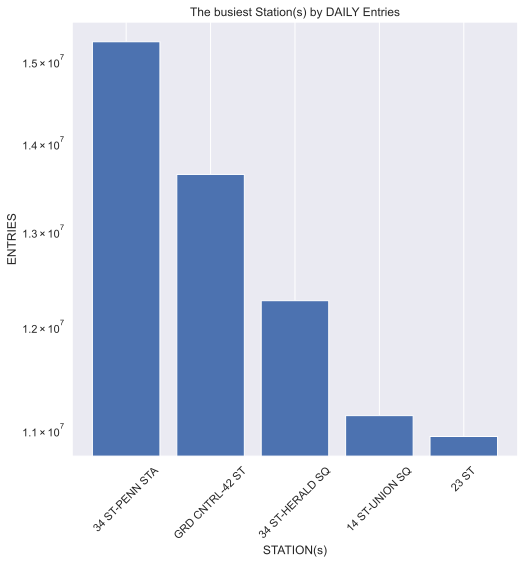

In [109]:
# Draw bar plot of the top 5 busiest stations by daily entries
plt.figure(figsize=[8,8])
plt.yscale('log')
plt.title("The busiest Station(s) by DAILY Entries")
plt.xlabel("STATION(s)")
plt.ylabel("ENTRIES")
plt.xticks(rotation=45)
plt.bar(station_totals.STATION[:5],station_totals.DAILY_ENTRIES[:5])
plt.savefig("daily.entries.stations.png")


In [76]:
single_turnstile = turnstiles_daily[(turnstiles_daily["C/A"] == "A011") & 
(turnstiles_daily["UNIT"] == "R080") & 
(turnstiles_daily["SCP"] == "01-00-00") & 
(turnstiles_daily["STATION"] == "57 ST-7 AV")]

single_turnstile.head()


C/A  UNIT       SCP     STATION       DATE           DATE_TIME  \
13962  A011  R080  01-00-00  57 ST-7 AV 2018-01-08 2018-01-08 07:00:00   
13963  A011  R080  01-00-00  57 ST-7 AV 2018-01-08 2018-01-08 11:00:00   
13964  A011  R080  01-00-00  57 ST-7 AV 2018-01-08 2018-01-08 15:00:00   
13965  A011  R080  01-00-00  57 ST-7 AV 2018-01-08 2018-01-08 19:00:00   
13966  A011  R080  01-00-00  57 ST-7 AV 2018-01-08 2018-01-08 23:00:00   

         ENTRIES  PREV_DATE  PREV_ENTRIES  DAILY_ENTRIES  
13962  886281931 2018-01-08   886281976.0           45.0  
13963  886281511 2018-01-08   886281931.0          420.0  
13964  886281046 2018-01-08   886281511.0          465.0  
13965  886279596 2018-01-08   886281046.0         1450.0  
13966  886278963 2018-01-08   886279596.0          633.0

Text(0.5, 1.0, 'Daily Entries for Turnstile A011/R080/01-00-00 at 57 ST-7 AV Station')

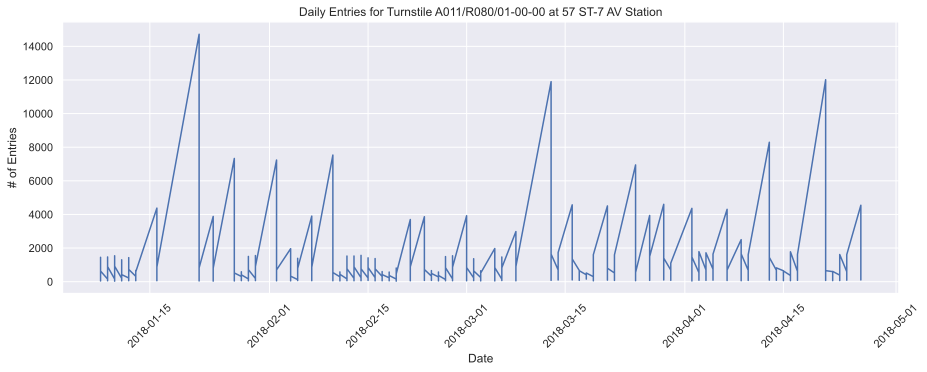

In [77]:
# Draw line chart representing the distribution of entries across different weeks in 2018
plt.figure(figsize=(15,5))
plt.plot(single_turnstile['DATE'], single_turnstile['DAILY_ENTRIES'])
plt.ylabel('# of Entries')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title('Daily Entries for Turnstile A011/R080/01-00-00 at 57 ST-7 AV Station')



In [78]:
station_daily_57_av = station_daily[station_daily['STATION'] == '57 ST-7 AV']
station_daily_57_av.head()

STATION       DATE  DAILY_ENTRIES
5547  57 ST-7 AV 2018-01-08        32448.0
5548  57 ST-7 AV 2018-01-09        36731.0
5549  57 ST-7 AV 2018-01-10        36756.0
5550  57 ST-7 AV 2018-01-11        36175.0
5551  57 ST-7 AV 2018-01-12        34454.0

Text(0.5, 1.0, 'Daily Entries for 57 ST-7 AV Station')

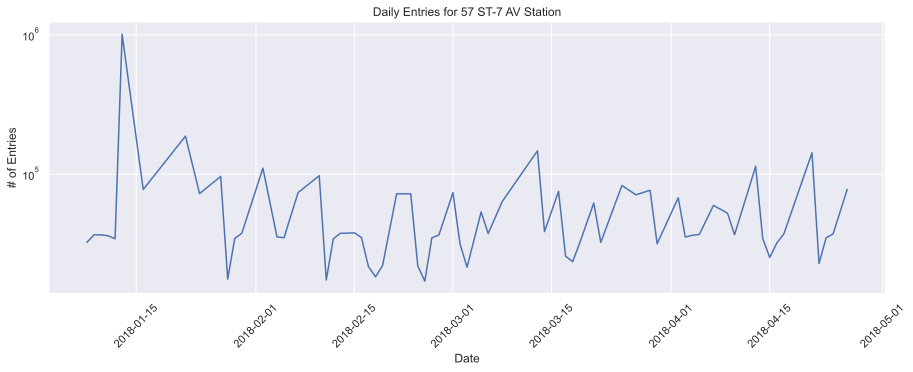

In [79]:
# Draw line chart representing the distribution of entries across different weeks in 2018
plt.figure(figsize=(15,5))
plt.plot(station_daily_57_av['DATE'], station_daily_57_av['DAILY_ENTRIES'])
plt.ylabel('# of Entries')
plt.xlabel('Date')
plt.yscale('log')
plt.xticks(rotation=45)
plt.title('Daily Entries for 57 ST-7 AV Station')



In [80]:
station_daily_57_av['DAY_OF_WEEK_NUM'] = pd.to_datetime(station_daily_57_av['DATE']).dt.dayofweek
station_daily_57_av['WEEK_OF_YEAR'] = pd.to_datetime(station_daily_57_av['DATE']).dt.week
station_daily_57_av.head()

<ipython-input-80-2a1e1cc4a8f2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  station_daily_57_av['DAY_OF_WEEK_NUM'] = pd.to_datetime(station_daily_57_av['DATE']).dt.dayofweek
<ipython-input-80-2a1e1cc4a8f2>:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  station_daily_57_av['WEEK_OF_YEAR'] = pd.to_datetime(station_daily_57_av['DATE']).dt.week
<ipython-input-80-2a1e1cc4a8f2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


STATION       DATE  DAILY_ENTRIES  DAY_OF_WEEK_NUM  WEEK_OF_YEAR
5547  57 ST-7 AV 2018-01-08        32448.0                0             2
5548  57 ST-7 AV 2018-01-09        36731.0                1             2
5549  57 ST-7 AV 2018-01-10        36756.0                2             2
5550  57 ST-7 AV 2018-01-11        36175.0                3             2
5551  57 ST-7 AV 2018-01-12        34454.0                4             2

Text(0.5, 1.0, 'Ridership per day for 57 ST-7 AV station')

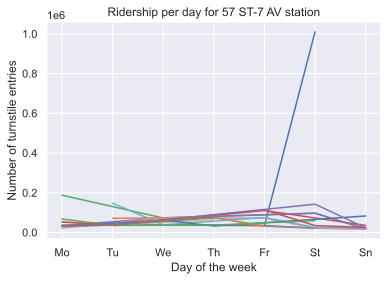

In [81]:
for i, group in station_daily_57_av.groupby('WEEK_OF_YEAR'):
    plt.plot(group['DAY_OF_WEEK_NUM'], group['DAILY_ENTRIES'])
    
    
plt.xlabel('Day of the week')
plt.ylabel('Number of turnstile entries')
plt.xticks(np.arange(7),['Mo','Tu','We','Th','Fr','St','Sn'])
plt.title('Ridership per day for 57 ST-7 AV station')

(array([114.,  95.,  46.,  33.,  28.,  17.,   7.,   5.,   4.,   3.,   3.,
          1.,   2.,   3.,   1.,   0.,   1.,   2.,   1.,   1.,   1.,   2.,
          0.,   0.,   1.,   0.,   1.,   0.,   0.,   1.]),
 array([   19236.        ,   527086.36666667,  1034936.73333333,
         1542787.1       ,  2050637.46666667,  2558487.83333333,
         3066338.2       ,  3574188.56666667,  4082038.93333333,
         4589889.3       ,  5097739.66666667,  5605590.03333333,
         6113440.4       ,  6621290.76666667,  7129141.13333333,
         7636991.5       ,  8144841.86666667,  8652692.23333333,
         9160542.6       ,  9668392.96666667, 10176243.33333333,
        10684093.7       , 11191944.06666667, 11699794.43333333,
        12207644.8       , 12715495.16666667, 13223345.53333333,
        13731195.9       , 14239046.26666667, 14746896.63333333,
        15254747.        ]),
 <BarContainer object of 30 artists>)

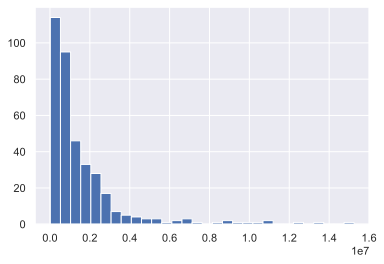

In [83]:
plt.hist(station_totals['DAILY_ENTRIES'],bins=30)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

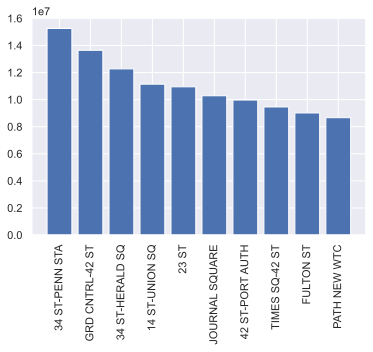

In [84]:
plt.bar(x=station_totals['STATION'][:10], height=station_totals['DAILY_ENTRIES'][:10])
plt.xticks(rotation=90)

In [ ]:
# Outlier Detection

In [86]:
# this function calculates the interquartile range and selects outliers from the data based on upper and lower bounds
# of outliers
def get_outliers(colName,df):
    if colName not in df:
        raise Exception("Colname does not exist in data frame")
    metrics = df[colName].describe()
    IQR = metrics['75%'] - metrics['25%']
    lower_bound = -1.5 * IQR
    upper_bound = 1.5 * IQR
    mask =   (df[colName] > lower_bound) & (df[colName] < upper_bound)
    return df[~mask] , upper_bound
    
outliers,upper_bound = get_outliers('ENTRIES',df)
outliers.head()

C/A  UNIT       SCP     STATION LINENAME DIVISION       DATE  \
3768584  S101A  R070  01-00-01  ST. GEORGE        1      SRT 2018-04-26   
3768581  S101A  R070  01-00-01  ST. GEORGE        1      SRT 2018-04-26   
3768578  S101A  R070  01-00-01  ST. GEORGE        1      SRT 2018-04-26   
3768575  S101A  R070  01-00-01  ST. GEORGE        1      SRT 2018-04-26   
3768572  S101A  R070  01-00-01  ST. GEORGE        1      SRT 2018-04-26   

             TIME   ENTRIES  EXITS  ...    TIMEZONE AIRPORTCODE      LAT  \
3768584  20:00:00  84093617   3344  ...  US/Eastern        KWST  41.3509   
3768581  16:00:00  84093355   3344  ...  US/Eastern        KWST  41.3509   
3768578  12:00:00  84093302   3344  ...  US/Eastern        KWST  41.3509   
3768575  08:00:00  84093293   3344  ...  US/Eastern        KWST  41.3509   
3768572  04:00:00  84093278   3344  ...  US/Eastern        KWST  41.3509   

             LNG      CITY      COUNTY STATE  ZIPCODE  STARTTIME_C  \
3768584 -71.8054  Westerly  Washington    RI   2891.0   2018-04-26   
3768581 -71.8054  Westerly  Washington    RI   2891.0   2018-04-26   
3768578 -71.8054  Westerly  Washington    RI   2891.0   2018-04-26   
3768575 -71.8054  Westerly  Washington    RI   2891.0   2018-04-26   
3768572 -71.8054  Westerly  Washington    RI   2891.0   2018-04-26   

                  DATE_TIME  
3768584 2018-04-26 20:00:00  
3768581 2018-04-26 16:00:00  
3768578 2018-04-26 12:00:00  
3768575 2018-04-26 08:00:00  
3768572 2018-04-26 04:00:00  

[5 rows x 25 columns]

In [ ]:
outliers.shape

Text(52.375, 0.5, 'Entries')

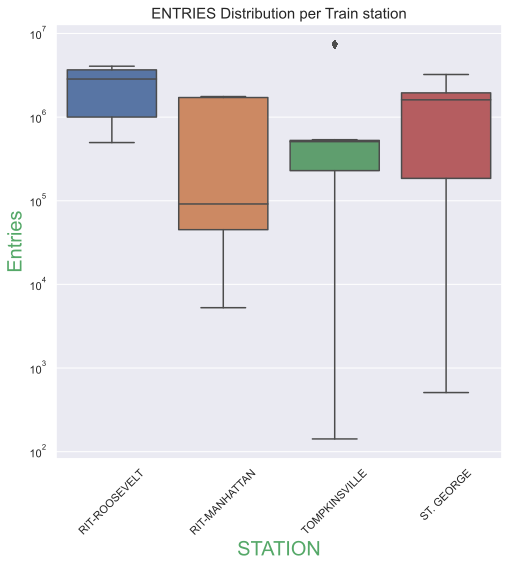

In [101]:
# draw entries distribution per train station
plt.figure(figsize=[8,8])
boxdata = df[['STATION','ENTRIES']][:10000]
plot = sns.boxplot(x='STATION',y='ENTRIES',data=boxdata)
plot.set_xticklabels(plot.get_xticklabels(),rotation=45)
plt.savefig("boxplot.stations.png")
plt.yscale('log')
plt.title("ENTRIES Distribution per Train station",fontsize=15)
plt.xlabel("STATION",color='g',fontsize=20)
plt.ylabel("Entries",color='g',fontsize=20)

Text(52.375, 0.5, 'Entries')

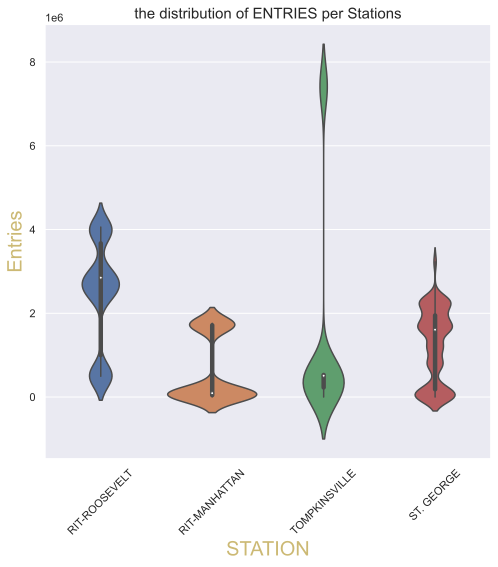

In [105]:
# draw violin plot to visualize the distribution of entries for the top 5 stations with variances/spreading.
plt.figure(figsize=[8,8])
p = sns.violinplot(x='STATION',y='ENTRIES',data=boxdata)
plt.xticks(rotation=45)
plt.savefig("violinplot.stations.png")
plt.title("the distribution of ENTRIES per Stations",fontsize=15)
plt.xlabel("STATION",color='y',fontsize=20)
plt.ylabel("Entries",color='y',fontsize=20)

In [107]:
df.shape

(1926904, 25)